# Time Varying Market Betas

In [1]:
from utils.models import *
env()

--------- Dependencies ---------
python: 3.8.10 | packaged by conda-forge | (default, May 11 2021, 06:25:23) [MSC v.1916 64 bit (AMD64)]
numpy: 1.21.0
pandas: 1.2.4
matplotlib: 3.4.2
scipy: 1.7.1
statsmodels: 0.13.0
filterpy: 1.4.5


## ECB Non-Energy Commodity Index Beta

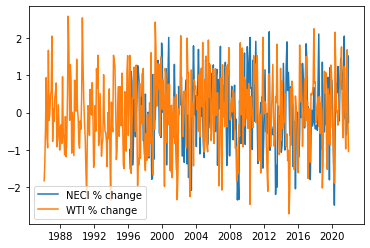

In [2]:
neci = clean_series('index', load('data/ECB_NECI.csv').pct_change().dropna())
c1 = clean_series('contract_1', load('data/WTI.csv').pct_change().dropna())
plt.plot(neci, label='NECI % change')
plt.plot(c1, label='WTI % change')
plt.legend()

In [3]:
lags = 0
x0 = 0
kalman = KF(x0, lags=lags)
kf = kalman.run('contract_1', 'index', c1.join(neci).dropna())

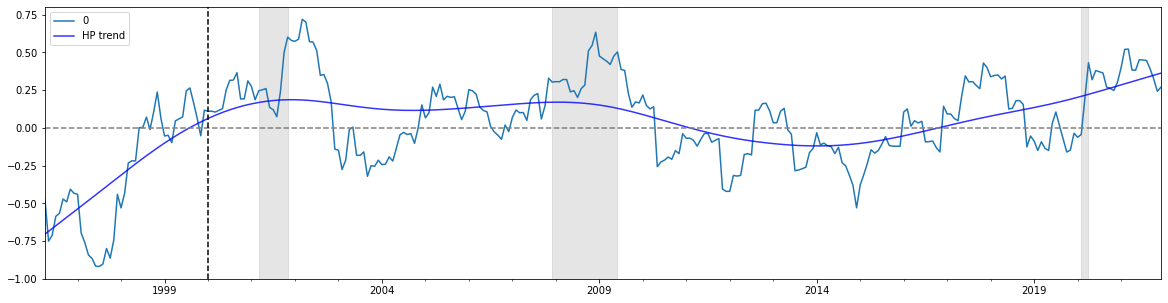

In [4]:
hp_kalman_plot(kf)

<BarContainer object of 1 artists>

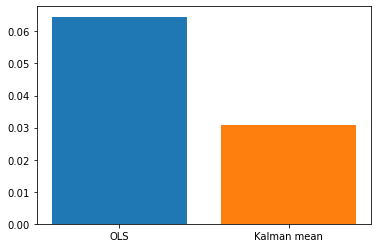

In [5]:
dl = DL('contract_1', 'index', c1.join(neci).dropna().iloc[lags:], lags=lags)
plt.bar('OLS', np.cumsum(dl.model.params))
plt.bar('Kalman mean', kf.mean())

RMSE Random Walk: 0.9946960295396331
RMSE OLS: 1.0090249954470802
RMSE Kalman: 0.9300505416017032


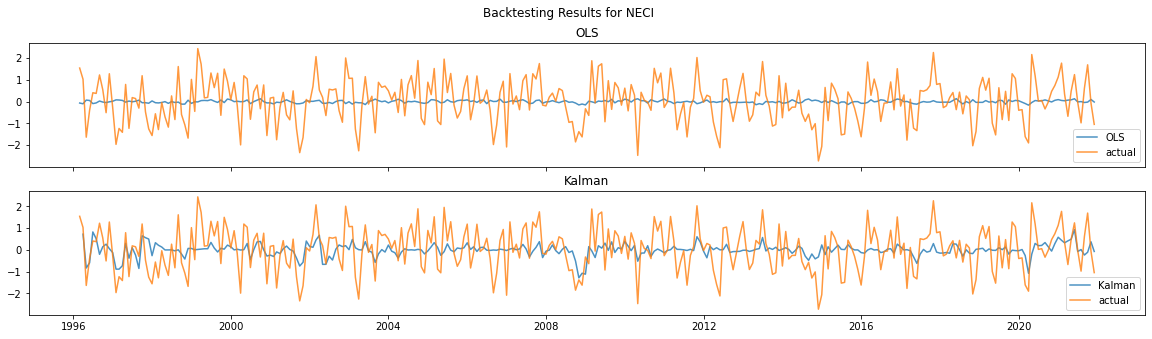

In [6]:
x = neci['index']
plot_backtests(c1.contract_1, 'NECI', {'OLS': ols_backtest(x, dl.model, lags=lags), 
                                  'Kalman': kalman.backtest()}, start=min(neci.index))

## Real Economic Activity Beta (Killian 2009) - volume of global shipping

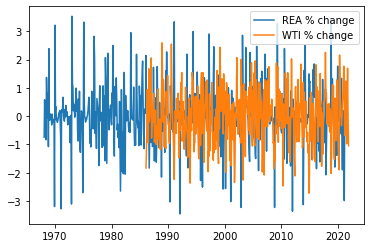

In [7]:
rea = clean_series('REA', load('data/REAGlobal.csv').pct_change().dropna())
plt.plot(rea, label='REA % change')
plt.plot(c1, label='WTI % change')
plt.legend()

In [8]:
kalman = KF(x0, lags=lags)
kf2 = kalman.run('contract_1', 'REA', c1.join(rea).dropna())

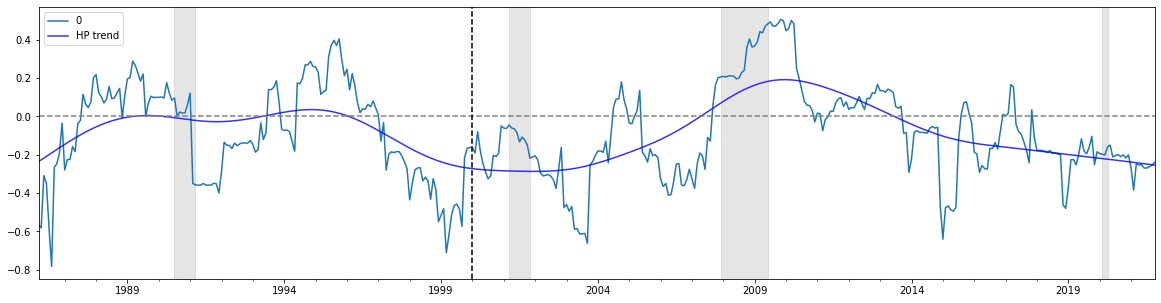

In [9]:
hp_kalman_plot(kf2)

<BarContainer object of 1 artists>

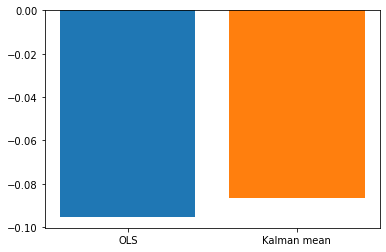

In [10]:
dl2 = DL('contract_1', 'REA', c1.join(rea).dropna().iloc[lags:], lags=lags)
plt.bar('OLS', np.cumsum(dl2.model.params))
plt.bar('Kalman mean', kf2.mean())

RMSE Random Walk: 0.9946960295396331
RMSE OLS: 0.8082861291536801
RMSE Kalman: 0.9253251180965756


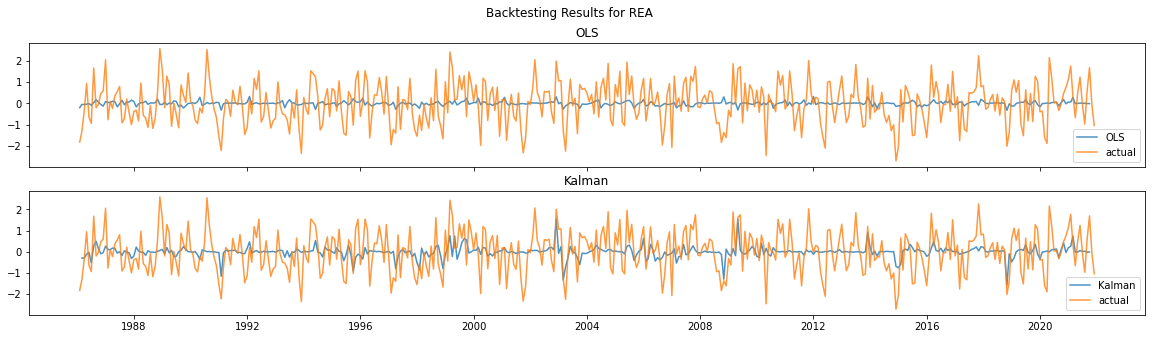

In [11]:
x = rea['REA']
plot_backtests(c1.contract_1, 'REA', {'OLS': ols_backtest(x, dl2.model, lags=lags), 
                                  'Kalman': kalman.backtest()}, start=min(c1.index))

## Natural Gas

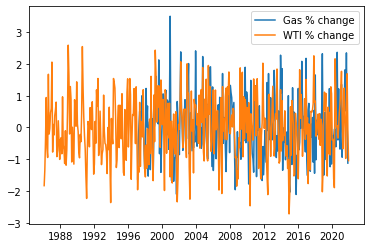

In [12]:
gas = clean_series('f_1', load('data/NGas.csv').pct_change().dropna())
plt.plot(gas, label='Gas % change')
plt.plot(c1, label='WTI % change')
plt.legend()

In [13]:
kalman = KF(x0, lags=lags)
kf3 = kalman.run('contract_1', 'f_1', c1.join(gas).dropna())

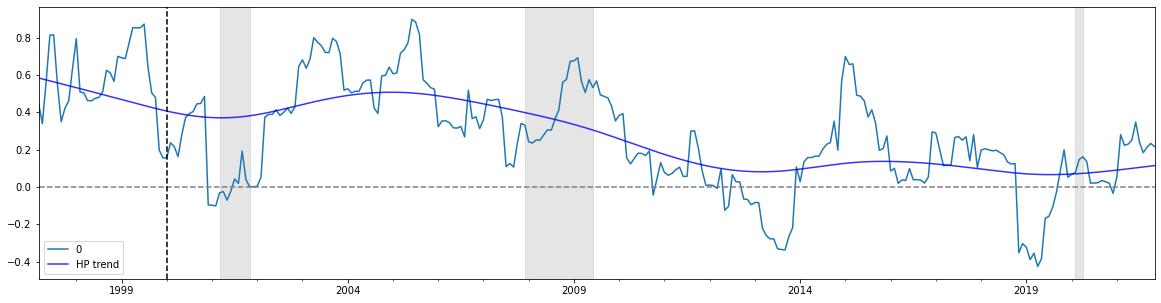

In [14]:
hp_kalman_plot(kf3)

<BarContainer object of 1 artists>

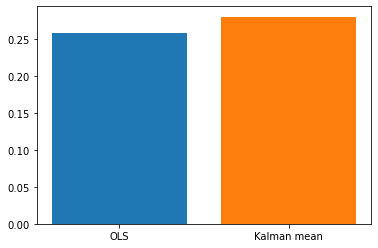

In [15]:
dl3 = DL('contract_1', 'f_1', c1.join(gas).dropna().iloc[lags:], lags=lags)
plt.bar('OLS', np.cumsum(dl3.model.params))
plt.bar('Kalman mean', kf3.mean())

RMSE Random Walk: 0.9946960295396331
RMSE OLS: 0.9804439503411146
RMSE Kalman: 0.8981503568550409


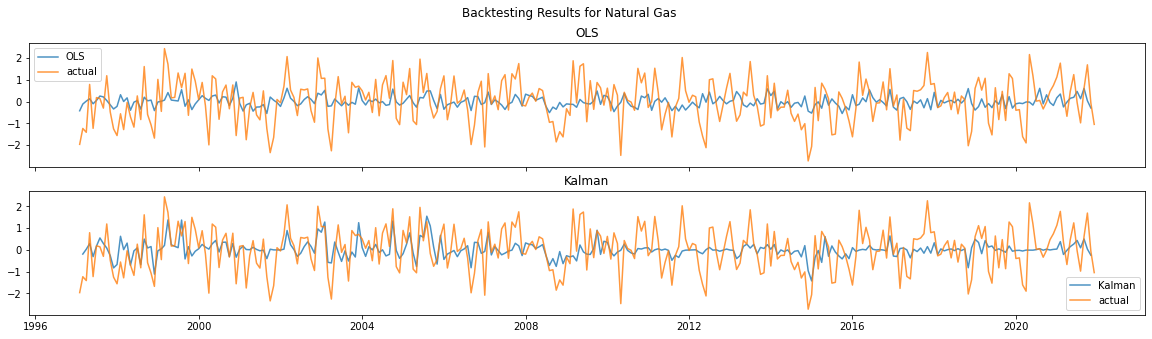

In [16]:
x = gas['f_1']
plot_backtests(c1.contract_1, 'Natural Gas', {'OLS': ols_backtest(x, dl3.model, lags=lags), 
                                  'Kalman': kalman.backtest()}, start=min(gas.index))

## S&P 500

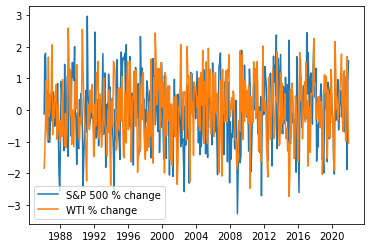

In [17]:
spx = clean_series('real', load('data/SP500.csv').pct_change().dropna())
plt.plot(spx, label='S&P 500 % change')
plt.plot(c1, label='WTI % change')
plt.legend()

In [18]:
kalman = KF(x0, lags=lags)
kf4 = kalman.run('contract_1', 'real', c1.join(spx).dropna())

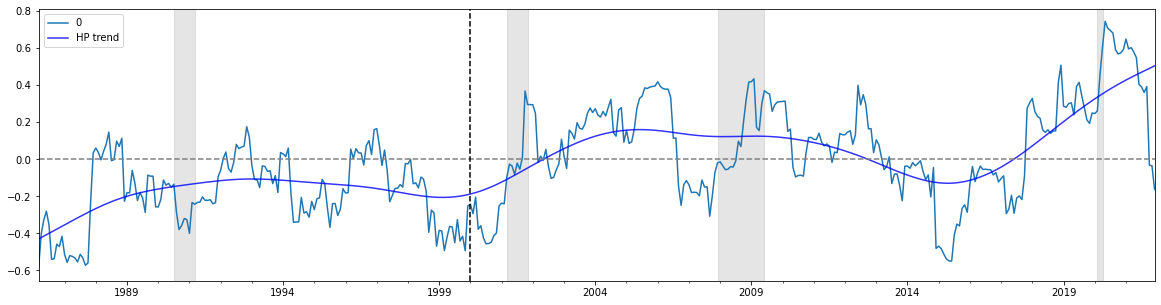

In [19]:
hp_kalman_plot(kf4)

OLS: -0.01910604903285508
Kalman: -0.022731278165328127


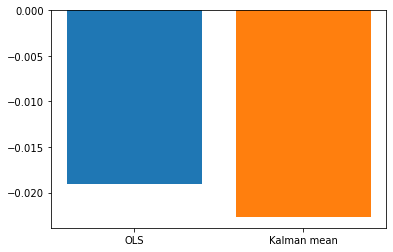

In [20]:
dl4 = DL('contract_1', 'real', c1.join(spx).dropna().iloc[lags:], lags=lags)
plt.bar('OLS', np.cumsum(dl4.model.params))
plt.bar('Kalman mean', kf4.mean())
print(f'OLS: {np.cumsum(dl4.model.params)[0]}\nKalman: {kf4.mean()[0]}')

RMSE Random Walk: 0.9946960295396331
RMSE OLS: 0.9944997738072151
RMSE Kalman: 0.9136212443941865


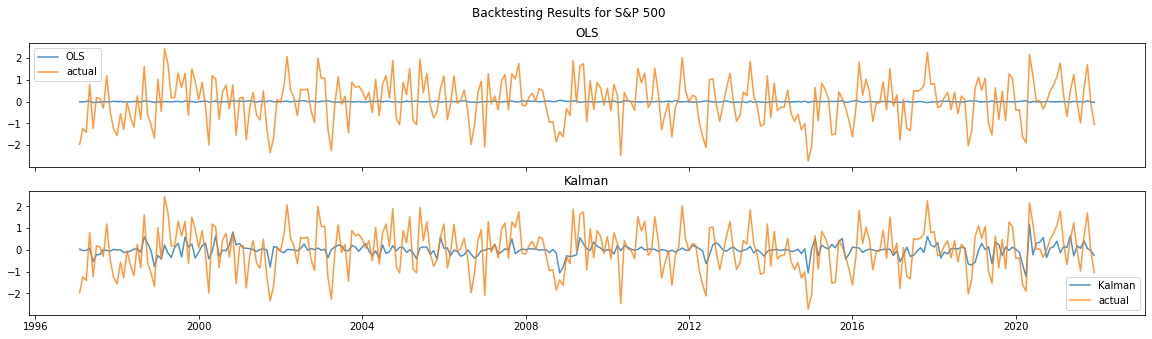

In [21]:
x = spx.real
plot_backtests(c1.contract_1, 'S&P 500', {'OLS': ols_backtest(x, dl4.model, lags=lags), 
                                  'Kalman': kalman.backtest()}, start=min(gas.index))

## MSCI World

In [22]:
msci = clean_series('real', load('data/MSCI_World.csv').pct_change().dropna())
kalman = KF(x0, lags=lags)
kf5 = kalman.run('contract_1', 'real', c1.join(msci).dropna())

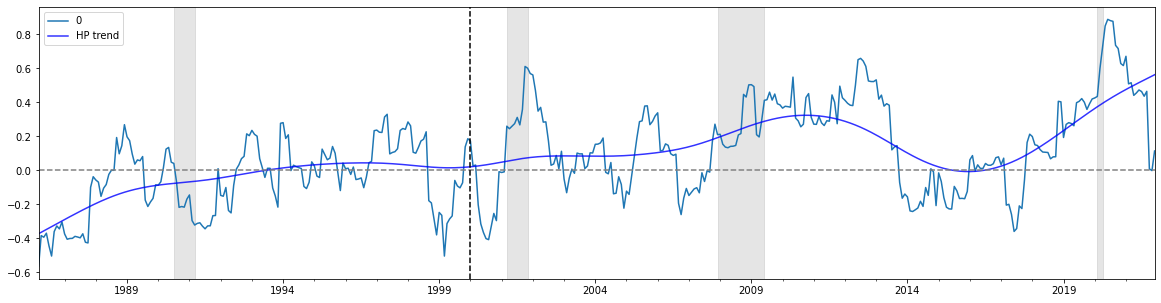

In [23]:
hp_kalman_plot(kf5)

OLS: 0.0912178837962964
Kalman: 0.0847905638263848


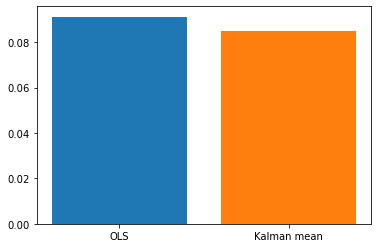

In [24]:
dl5 = DL('contract_1', 'real', c1.join(msci).dropna().iloc[lags:], lags=lags)
plt.bar('OLS', np.cumsum(dl5.model.params))
plt.bar('Kalman mean', kf5.mean())
print(f'OLS: {np.cumsum(dl5.model.params)[0]}\nKalman: {kf5.mean()[0]}')

RMSE Random Walk: 0.9946960295396331
RMSE OLS: 0.9904711785933186
RMSE Kalman: 0.9065396764467274


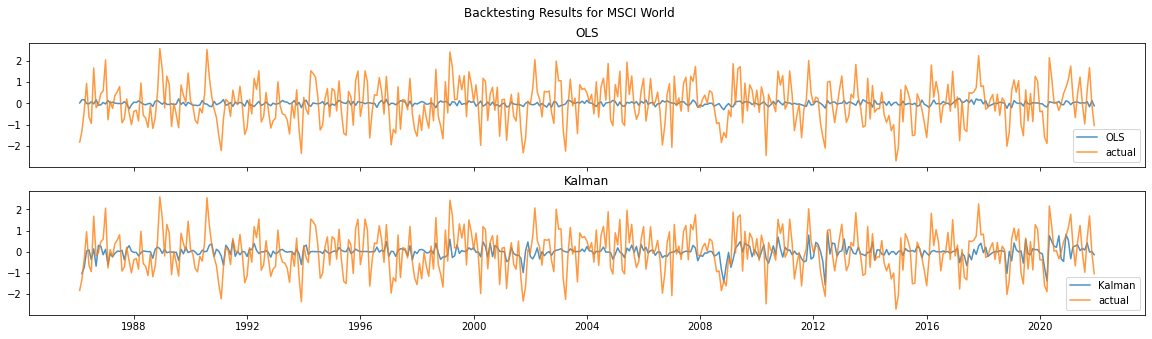

In [25]:
x = msci.real
plot_backtests(c1.contract_1, 'MSCI World', {'OLS': ols_backtest(x, dl5.model, lags=lags), 
                                  'Kalman': kalman.backtest()}, start=min(msci.index))